In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
#importing the dataset and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import median_abs_deviation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/label-encoded-cleaned-dataset/LabelEncoded.csv") 

In [ ]:
df

In [ ]:
df.info()

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

In [4]:
#splitting the dataset and fitting the scaler

y = df['Severity']
X = df.drop('Severity', axis=1)

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:

Tree = DecisionTreeClassifier()
Tree = Tree.fit(X_train, y_train)

y_pred = Tree.predict(X_test)
print("Tree accuracy: ", accuracy_score(y_test,y_pred)*100)

print("Train Accuracy:", Tree.score(X_train, y_train))
print("Test Accuracy:", Tree.score(X_test, y_test))

Tree accuracy:  82.06320467451239
Train Accuracy: 0.9999382763675643
Test Accuracy: 0.8206320467451239


In [7]:
#Train decision trees using gini criteria

giniTree = DecisionTreeClassifier(criterion = "gini", splitter = "random", random_state = 42)
giniTree = giniTree.fit(X_train, y_train)

y_pred = giniTree.predict(X_test)
print("Gini Tree accuracy: ", accuracy_score(y_test,y_pred)*100)

print("Train Accuracy:", giniTree.score(X_train, y_train))
print("Test Accuracy:", giniTree.score(X_test, y_test))

Gini Tree accuracy:  82.24425973170932
Train Accuracy: 0.9999382763675643
Test Accuracy: 0.8224425973170932


In [14]:
#Train decision trees using entropy criteria

entropyTree = DecisionTreeClassifier(criterion = "entropy", splitter = "random", random_state = 42)
entropyTree = entropyTree.fit(X_train, y_train)

y_pred = entropyTree.predict(X_test)
print("Entropy Tree accuracy: ", accuracy_score(y_test,y_pred)*100)
print("Train Accuracy:", entropyTree.score(X_train, y_train))
print("Test Accuracy:", entropyTree.score(X_test, y_test))

Entropy Tree accuracy:  82.03234301703563
Train Accuracy: 0.9999382763675643
Test Accuracy: 0.8203234301703564


In [22]:
rf = RandomForestClassifier(criterion = "gini")
rf = rf.fit(X_train, y_train)

# Predict on the test set
best_test_pred = rf.predict(X_test)
print('Accuracy on training set: ', rf.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, best_test_pred))
print()

print("Classification Report")
print(classification_report(y_test, best_test_pred))
print()



Accuracy on training set:  0.9999279890954916
Accuracy on the test set:  0.8845774010369517

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.90      0.93      0.91     30828
           3       0.86      0.82      0.84     16821
           4       0.86      0.54      0.67       941

    accuracy                           0.88     48604
   macro avg       0.66      0.57      0.60     48604
weighted avg       0.88      0.88      0.88     48604




Confusion Matrix


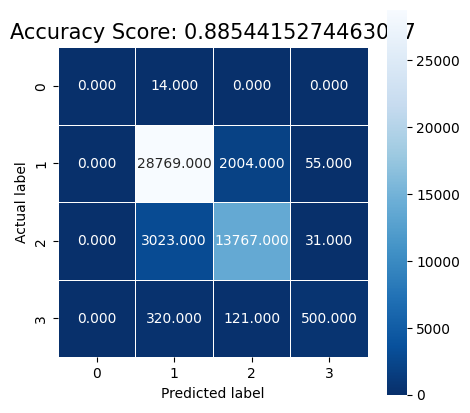

In [21]:
print("Confusion Matrix")
# Plot a confusion matrix
cm = confusion_matrix(y_test, best_test_pred)
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, best_test_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('MLP.png')
plt.show()

In [23]:
rf = RandomForestClassifier(criterion = "entropy")
rf = rf.fit(X_train, y_train)

# Predict on the test set
best_test_pred = rf.predict(X_test)
print('Accuracy on training set: ', rf.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, best_test_pred))
print()

print("Classification Report")
print(classification_report(y_test, best_test_pred))
print()

Accuracy on training set:  0.9999228454594553
Accuracy on the test set:  0.8858735906509753

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.90      0.93      0.91     30828
           3       0.87      0.82      0.84     16821
           4       0.85      0.57      0.68       941

    accuracy                           0.89     48604
   macro avg       0.65      0.58      0.61     48604
weighted avg       0.88      0.89      0.88     48604




Confusion Matrix


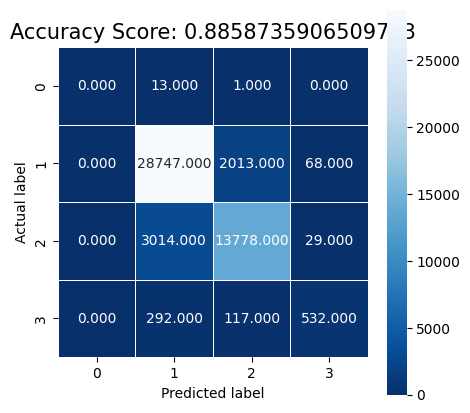

In [24]:
print("Confusion Matrix")
# Plot a confusion matrix
cm = confusion_matrix(y_test, best_test_pred)
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, best_test_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('MLP.png')
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion = "gini")

grid = {'min_samples_split': [1, 5, 10, 50, 100, 500, 1000, 2000, 5000],
        'max_features': [1, 5, 9, 10, 11, 12, 15, 18]}


grid = GridSearchCV(dt, param_grid = grid, cv = 5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy")

grid = {'min_samples_split': [1, 5, 10, 50, 100, 500, 1000, 2000, 5000],
        'max_features': [1, 5, 9, 10, 11, 12, 15, 18]}

grid = GridSearchCV(dt, param_grid = grid, cv = 5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

In [ ]:
rf = RandomForestClassifier(criterion = "gini")
grid = {'n_estimators': [100, 200, 500, 1000],
        'max_depth': [1, 10, 20, 100, 500],
        'min_samples_split': [1, 2, 5, 10, 20, 100, 500]}

grid = GridSearchCV(rf, param_grid = grid, cv=5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

In [ ]:
rf = RandomForestClassifier(criterion = "entropy")

grid = {'n_estimators': [100, 200, 500, 1000],
        'max_depth': [1, 10, 20, 100, 500],
        'min_samples_split': [1, 2, 5, 10, 20, 100, 500]}

grid = GridSearchCV(rf, param_grid = grid, cv=5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))